In [1]:
import spartan2.ioutil as ioutil
import spartan2.basicutil as iatutil
import spartan2.drawutil as drawutil

## extracttimes function
extract time stamps in log files or edgelist tensor

groupids: the group col idx used for aggregating timestamps
output: dict file at './output/ts.dict' whose key is an integer(user id) and value is a list of integers(timestamp list)

In [2]:
infile = './inputData/test.reid.gz'
tsfile = './output/ts.dict'
ioutil.extracttimes(infile, outfile=tsfile, timeidx=0, timeformat='%Y-%m-%d %H:%M:%S', delimeter='\x01',
                        isbyte=True, comments='#', nodetype=str, groupids=[1])

	processing file test.reid.gz


''

## Example

we have a dict file at './inputData/col1sagg.ts' and we use loadDictListData to load this dict whose key is an integer(user id) and value is a list of integers(timestamp list).

In [3]:
tsfile = './output/ts.dict'
aggts = ioutil.loadDictListData(tsfile, ktype=int, vtype=int)

## IAT class

calaggiat function：calculate iat dict **aggiat** (key:user, value: iat list)

caliatcount function：calculate iat count dict **iatcount** (key:iat, value: frequency)

In [4]:
instance = iatutil.IAT()

In [5]:
# calculate aggiat dict
instance.calaggiat(aggts)
aggiat = instance.aggiat

In [6]:
# calculate iatcount dict
instance.caliatcount()
iatcount = instance.iatcount

''

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


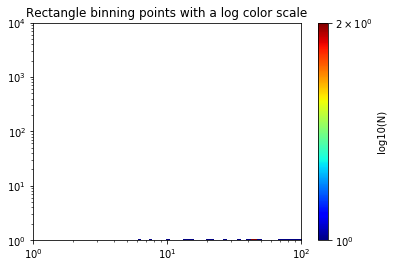

In [7]:
# draw hist2d figure for iat-count pair
xs, ys = [], []
for k,v in iatcount.items():
    xs.append(k)
    ys.append(v)
drawutil.drawRectbin(xs, ys)